In [19]:
import os
import cv2
import pytesseract 
import numpy as np
import re
import matplotlib.pyplot as plt


In [20]:
# Configuring the pytessaract path from disk
pytesseract.pytesseract.tesseract_cmd = r'D:\License Plate Recognition System\PYTessarect\tesseract.exe'


In [21]:
detected_list = []
folder_path = 'Resources'

Resources\Plate1.jpg


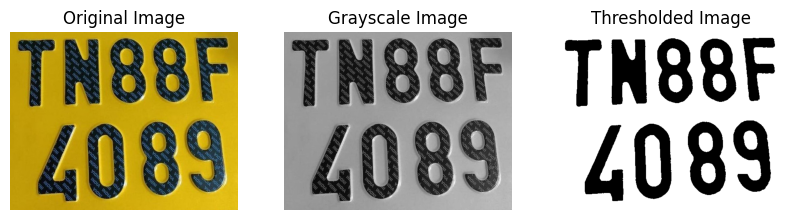

Resources\Plate10.png


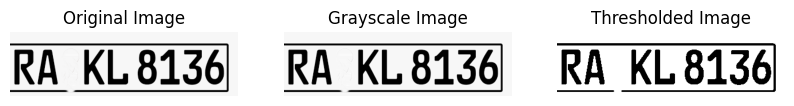

Resources\Plate2.jpg


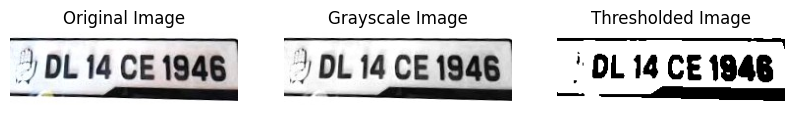

Resources\Plate3.png


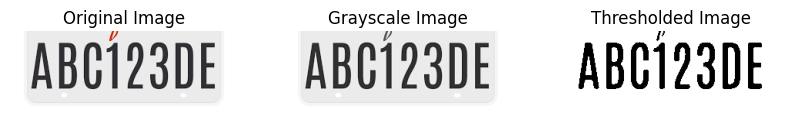

Resources\Plate4.webp


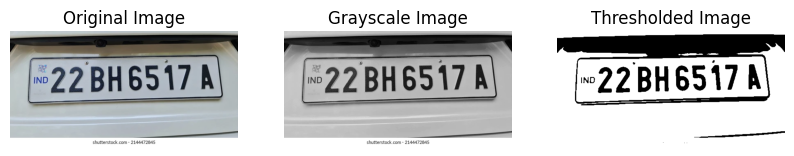

Resources\Plate5.jpg


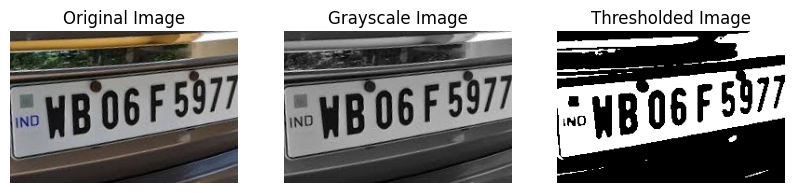

Resources\Plate6.jpg


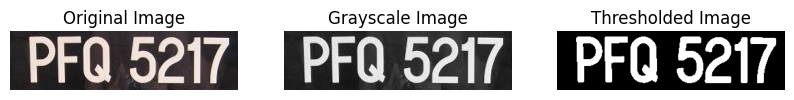

Resources\Plate7.jpg


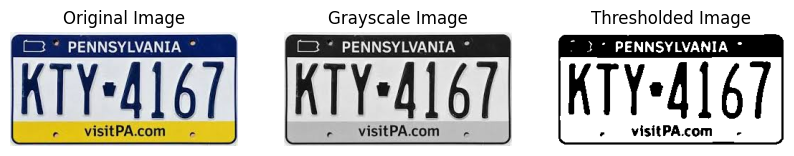

Resources\Plate8.jpg


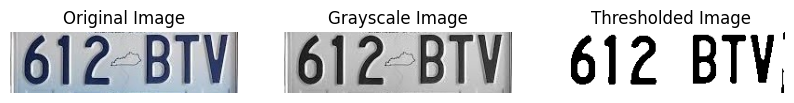

Resources\Plate9.jpg


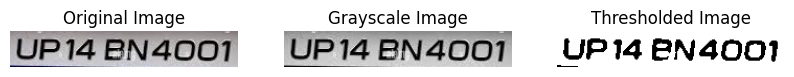

In [22]:
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Reading the image from the file path
    img = cv2.imread(file_path)
    print(file_path)

    # Converting the raw image to grayscale image for better text detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply some preprocessing like gaussian blur to detect soft edges
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Using Tesseract OCR to recognize text
    text = pytesseract.image_to_string(threshold, config='--psm 6').strip()
    filtered_text = re.sub(r'[^A-Z0-9]', '', text)
    if filtered_text:
        detected_list.append(filtered_text)

    # Display the processed image using matplotlib
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Grayscale Image")
    plt.imshow(gray, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Thresholded Image")
    plt.imshow(threshold, cmap='gray')
    plt.axis('off')

    plt.show()



In [23]:
print(detected_list)

['TN88F4083', 'RAKL8136', 'DL14CE1946', 'ABC123DE', '22BH6517A', 'WB06F597', 'PFQ5217', 'KTYAIGT', '612BTV', 'UP14BN4001']
